In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib.text import TextPath
from matplotlib.patches import PathPatch
from matplotlib.font_manager import FontProperties
from Programme.MyModuleLibrary.array_modifier import rolling_window

# os.chdir("/home/invites/routhier/sequence_design/")

In [ ]:
def get_energy_sequence(length, repeat):
    energy = pd.read_csv(
        "./Results_nucleosome/visu_"
        + str(length)
        + "_directory_"
        + str(repeat)
        + "/energy.txt",
        names=["indexes", "energy"],
    ).energy.values
    penalties = np.zeros((3 * length,))
    energy_array = np.zeros((length, 4))

    energy_seq = np.load(
        "./Results_nucleosome/visu_"
        + str(length)
        + "_directory_"
        + str(repeat)
        + "/used_energy_"
        + str(0)
        + ".npy"
    )
    mut_position = np.where(
        np.logical_and(
            energy_seq >= energy[0] - 0.00000001, energy_seq <= energy[0] + 0.00000001
        )
    )[0][0]
    penalties[mut_position] -= 1

    for step in range(1, 20):
        energy_seq = np.load(
            "./Results_nucleosome/visu_"
            + str(length)
            + "_directory_"
            + str(repeat)
            + "/used_energy_"
            + str(step)
            + ".npy"
        )
        energy_seq += penalties

        mut_position = np.where(
            np.logical_and(
                energy_seq >= energy[step] - 0.00000001,
                energy_seq <= energy[step] + 0.00000001,
            )
        )[0][0]
        penalties[mut_position] -= 1

        sequence = np.load(
            "./Results_nucleosome/visu_"
            + str(length)
            + "_directory_"
            + str(repeat)
            + "/designed_sequence_"
            + str(step)
            + ".npy"
        )

        for i in range(3):
            energy_array[np.arange(length), (sequence + i) % 4] += (
                np.abs((energy_seq - energy[step - 1])[i::3]) / 19.0
            )
    return energy_array

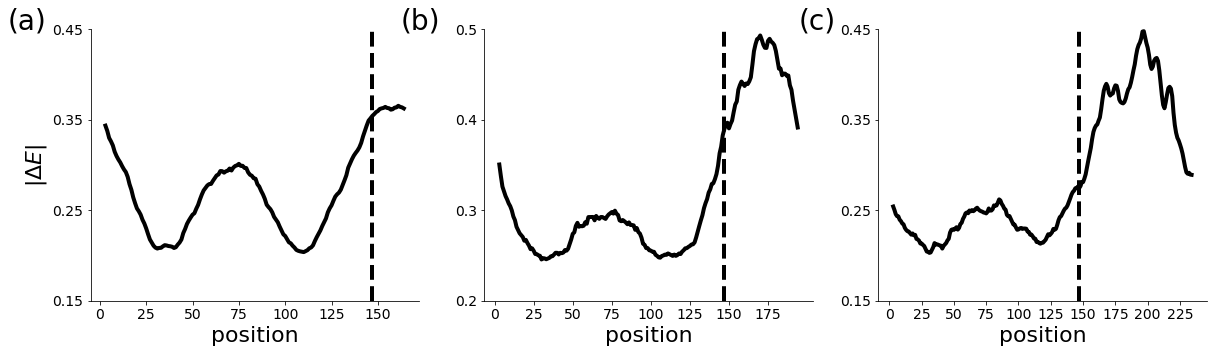

In [635]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 3, 1)
fontsize = 14
linewidth = 4

length = 167
energy_gain_per_pos = np.zeros((length, 4))

for i in range(101, 444):
    energy_gain_per_pos += get_energy_sequence(length, i)

energy_gain_per_pos /= 343.0
energy_gain_per_pos = np.sum(energy_gain_per_pos, axis=1)

window = 6
ax.plot(
    np.arange(window // 2, length - (window // 2 - 1 + (window % 2))),
    np.mean(rolling_window(energy_gain_per_pos, window), axis=1),
    color="k",
    linewidth=linewidth,
    label="rolling mean",
)

ax.axvline(x=147, linestyle="--", color="k", linewidth=linewidth)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xticks(np.arange(0, length, 25))
ax.set_xticklabels(np.arange(0, length, 25), fontsize=fontsize)
ax.set_ylim(0.15, 0.45)
ax.set_yticks(np.arange(0.15, 0.55, 0.1))
ax.set_yticklabels(np.round(np.arange(0.15, 0.55, 0.1), 3), fontsize=fontsize)
ax.set_xlabel("position", fontsize=fontsize + 8)
ax.set_ylabel(r"|$\Delta E$|", fontsize=fontsize + 8)
ax.text(x=-50, y=0.45, s="(a)", fontsize=fontsize + 14)

ax1 = fig.add_subplot(1, 3, 2)
length = 197
energy_gain_per_pos = np.zeros((length, 4))

for i in range(101, 400):
    energy_gain_per_pos += get_energy_sequence(length, i)

energy_gain_per_pos /= 299.0
energy_gain_per_pos = np.sum(energy_gain_per_pos, axis=1)

ax1.plot(
    np.arange(window // 2, length - (window // 2 - 1 + (window % 2))),
    np.mean(rolling_window(energy_gain_per_pos, window), axis=1),
    color="k",
    linewidth=linewidth,
    label="rolling mean",
)


ax1.axvline(x=147, linestyle="--", color="k", linewidth=linewidth)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.set_xticks(np.arange(0, length, 25))
ax1.set_xticklabels(np.arange(0, length, 25), fontsize=fontsize)
ax1.set_ylim(0.2, 0.5)
ax1.set_yticks(np.arange(0.2, 0.6, 0.1))
ax1.set_yticklabels(np.round(np.arange(0.2, 0.6, 0.1), 3), fontsize=fontsize)
ax1.set_xlabel("position", fontsize=fontsize + 8)
ax1.text(x=-60, y=0.5, s="(b)", fontsize=fontsize + 14)

ax2 = fig.add_subplot(1, 3, 3)
length = 237
energy_gain_per_pos = np.zeros((length, 4))

for i in range(101, 317):
    energy_gain_per_pos += get_energy_sequence(length, i)

energy_gain_per_pos /= 216.0
energy_gain_per_pos = np.sum(energy_gain_per_pos, axis=1)

ax2.plot(
    np.arange(window // 2, length - (window // 2 - 1 + (window % 2))),
    np.mean(rolling_window(energy_gain_per_pos, window), axis=1),
    color="k",
    linewidth=linewidth,
    label="rolling mean",
)


ax2.axvline(x=147, linestyle="--", color="k", linewidth=linewidth)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.set_xticks(np.arange(0, length, 25))
ax2.set_xticklabels(np.arange(0, length, 25), fontsize=fontsize)
ax2.set_ylim(0.15, 0.45)
ax2.set_yticks(np.arange(0.15, 0.55, 0.1))
ax2.set_yticklabels(np.round(np.arange(0.15, 0.55, 0.1), 3), fontsize=fontsize)
ax2.set_xlabel("position", fontsize=fontsize + 8)
ax2.text(x=-70, y=0.45, s="(c)", fontsize=fontsize + 14)  #

fig.savefig(
    "/users/invites/routhier/Documents/Presentations/Article_sequence_design/estimated_gain_localization.eps",
    format="eps",
    bbox_inchesstr="tight",
)
fig.savefig(
    "/users/invites/routhier/Documents/Presentations/Article_sequence_design/estimated_gain_localization.png",
    format="png",
    bbox_inchesstr="tight",
)

In [183]:
from sklearn.cluster import DBSCAN
# from sklearn.cluster import AgglomerativeClustering


def _letterAt(letter, x, y, yscale=1, ax=None):
    fp = FontProperties(family="Arial", weight="bold")
    globscale = 1.35
    LETTERS = {
        "T": TextPath((-0.305, 0), "T", size=1, prop=fp),
        "G": TextPath((-0.384, 0), "G", size=1, prop=fp),
        "A": TextPath((-0.35, 0), "A", size=1, prop=fp),
        "C": TextPath((-0.366, 0), "C", size=1, prop=fp),
    }
    COLOR_SCHEME = {"G": "orange", "A": "red", "C": "blue", "T": "darkgreen"}

    text = LETTERS[letter]

    t = (
        mpl.transforms.Affine2D().scale(1 * globscale, yscale * globscale)
        + mpl.transforms.Affine2D().translate(x, y)
        + ax.transData
    )
    p = PathPatch(text, lw=0, fc=COLOR_SCHEME[letter], transform=t)
    if ax != None:
        ax.add_artist(p)
    return p


def create_logos(pfm):
    pfm[pfm == 0] = 0.001
    return pfm * (
        2
        + np.concatenate(
            [np.expand_dims(np.sum(pfm * np.log2(pfm), axis=-1), -1) for i in range(4)],
            -1,
        )
    )


def plot_logo(motif, name=None, figsize=(3, 1.6)):
    """
    Plot a logo associated to a motif, the motif must be a numpy array with 1 standing for A, 2 for T, 3 for G
    and 4 for C.
    """
    fig, ax = plt.subplots(figsize=figsize)
    all_scores = [
        [("A", motif[i, 0]), ("T", motif[i, 1]), ("G", motif[i, 2]), ("C", motif[i, 3])]
        for i in range(motif.shape[0])
    ]
    ax.set_facecolor("w")
    # ax.set_axis_off()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

    x = 1
    maxi = 0
    for scores in all_scores:
        y = 0
        for base, score in scores:
            _letterAt(base, x, y, score, ax)
            y += score
        x += 1
        maxi = max(maxi, y)

    ax.set_xticks([])
    ax.set_xlim((0, x))
    ax.set_ylim((0, 2))

    if name:
        fig.savefig("Results/" + name + ".png", format="png")
    plt.tight_layout()
    # plt.show()


def return_mutations(delta, site):
    mutation = "after"
    mutations = np.concatenate(
        [
            np.load(
                "/users/invites/routhier/Documents/sequence_design/mutation_"
                + str(length)
                + "_"
                + site
                + "_"
                + delta
                + "_"
                + mutation
                + ".npy"
            )
            for length in [167, 197, 237]
        ],
        axis=0,
    )
    mutations = (np.arange(4) == mutations[..., None] - 1).astype(int)

    mutation = "before"
    before_mutations = np.concatenate(
        [
            np.load(
                "/users/invites/routhier/Documents/sequence_design/mutation_"
                + str(length)
                + "_"
                + site
                + "_"
                + delta
                + "_"
                + mutation
                + ".npy"
            )
            for length in [167, 197, 237]
        ],
        axis=0,
    )
    before_mutations = (np.arange(4) == before_mutations[..., None] - 1).astype(int)
    return mutations, before_mutations


def reverse_tensor(mut):
    mut = mut[:, :, ::-1]
    value = np.reshape(np.where(mut == 1)[2], (len(mut), 5))

    value[value == 0] = 4
    value[value == 1] = 5
    value[value == 2] = 6
    value[value == 3] = 7

    value[value == 4] = 1
    value[value == 5] = 0
    value[value == 6] = 3
    value[value == 7] = 2
    return (np.arange(4) == value[..., None]).astype(int)


def reverse_tensor(mut):
    mut = mut[:, :, ::-1]
    value = np.reshape(np.where(mut == 1)[2], (len(mut), 5))

    value[value == 0] = 4
    value[value == 1] = 5
    value[value == 2] = 6
    value[value == 3] = 7

    value[value == 4] = 1
    value[value == 5] = 0
    value[value == 6] = 3
    value[value == 7] = 2
    return (np.arange(4) == value[..., None]).astype(int)


def reverse(mut):
    mut = mut[::-1]
    value = np.where(mut == 1)[1]

    value[value == 0] = 4
    value[value == 1] = 5
    value[value == 2] = 6
    value[value == 3] = 7

    value[value == 4] = 1
    value[value == 5] = 0
    value[value == 6] = 3
    value[value == 7] = 2
    return (np.arange(4) == value[..., None]).astype(int)


def change_distance(mut, selected_mut):
    mut_rc = reverse(mut)
    rc_distance = np.mean([np.sum((mut_rc - mut_l) ** 2) for mut_l in selected_mut])
    d_distance = np.mean([np.sum((mut - mut_l) ** 2) for mut_l in selected_mut])
    return rc_distance - d_distance


def return_logos(mutations, before_mutations, affinity):
    # n_clusters = 20
    # labels = AgglomerativeClustering(n_clusters,
    #                                 affinity='precomputed',
    #                                 linkage='average').fit_predict(affinity)

    labels = DBSCAN(eps=0.2, metric="precomputed").fit_predict(affinity)

    for i in np.unique(labels):
        # if len(labels[labels == i]) / len(labels) > 0.05:
        print(len(labels[labels == i]) / len(labels))
        if i != -1:
            selected_mut = np.copy(mutations[labels == i])
            before_selected_mut = np.copy(before_mutations[labels == i])
            for j, mut in enumerate(selected_mut):
                if change_distance(mut, selected_mut) < 0:
                    selected_mut[j] = reverse(mut)
                    before_selected_mut[j] = reverse(before_selected_mut[j])
            plot_logo(create_logos(np.mean(selected_mut, axis=0)))
            plot_logo(create_logos(np.mean(before_selected_mut, axis=0)))


def calculate_distance(mutations):
    helper_array = np.zeros((len(mutations), len(mutations), 5, 4))
    helper_array_T = np.zeros((len(mutations), len(mutations), 5, 4))
    reverse_array_T = np.zeros((len(mutations), len(mutations), 5, 4))
    reverse_mutation = reverse_tensor(mutations)

    for i in range(len(helper_array)):
        helper_array[i] = mutations
        helper_array_T[:, i] = mutations
        reverse_array_T[:, i] = reverse_mutation

    d_distance = np.sum(np.sum((helper_array - helper_array_T) ** 2, axis=3), axis=2)
    rc_distance = np.sum(np.sum((helper_array - reverse_array_T) ** 2, axis=3), axis=2)
    return np.minimum(d_distance, rc_distance)

In [211]:
mutations_linker_positive, before_linker_positive = return_mutations(
    "positive", "linker"
)
sampling_linker_positive = np.random.randint(0, len(mutations_linker_positive), 10000)
affinity_linker_positive = calculate_distance(
    mutations_linker_positive[sampling_linker_positive]
)

mutations_dyad_positive, before_dyad_positive = return_mutations("positive", "dyad")
sampling_dyad_positive = np.random.randint(0, len(mutations_dyad_positive), 10000)
affinity_dyad_positive = calculate_distance(
    mutations_dyad_positive[sampling_dyad_positive]
)

mutations_dyad_negative, before_dyad_negative = return_mutations("negative", "dyad")
sampling_dyad_negative = np.random.randint(0, len(mutations_dyad_negative), 100)
affinity_dyad_negative = calculate_distance(
    before_dyad_negative[sampling_dyad_negative]
)

0.1247


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


0.1371
0.0951
0.0718
0.1748
0.1451
0.0878


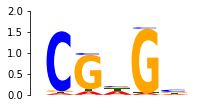

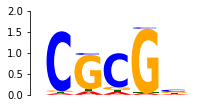

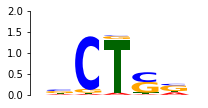

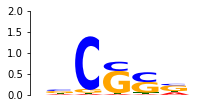

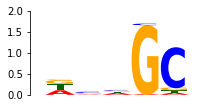

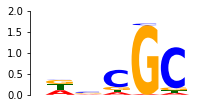

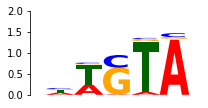

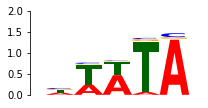

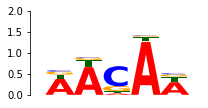

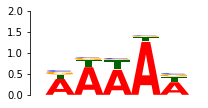

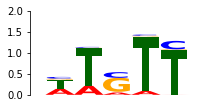

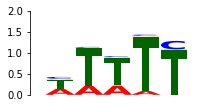

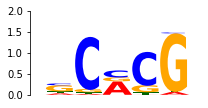

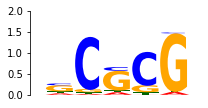

In [79]:
return_logos(
    mutations_linker_positive[sampling_linker_positive],
    before_linker_positive[sampling_linker_positive],
    affinity_linker_positive,
)

0.1375
0.1393
0.1207
0.1442
0.1552
0.1318


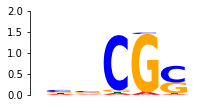

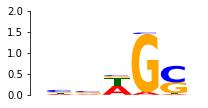

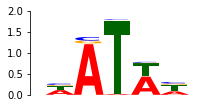

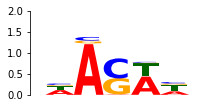

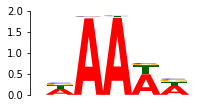

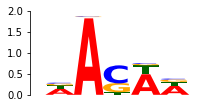

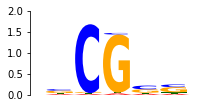

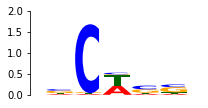

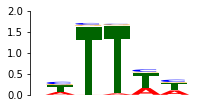

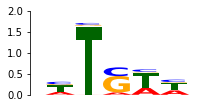

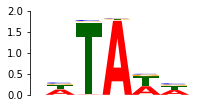

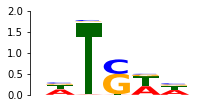

In [80]:
return_logos(
    mutations_dyad_positive[sampling_dyad_positive],
    before_dyad_positive[sampling_dyad_positive],
    affinity_dyad_positive,
)